In [5]:
# Debug
!pip install -Uqq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


In [ ]:
## Encender y apagar el debugger
%pdb off
## Para agregar un breakpoint
# ipdb.set_trace()

In [6]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/4%20Estrategias%20Evolutivas/C%C3%B3digos/1%20(1%2B1)-ES/Plot_Surf.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/4%20Estrategias%20Evolutivas/C%C3%B3digos/1%20(1%2B1)-ES/Plot_Contour.py'

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

--2023-09-22 01:04:34--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/4%20Estrategias%20Evolutivas/C%C3%B3digos/1%20(1%2B1)-ES/Plot_Surf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608 [text/plain]
Saving to: ‘Plot_Surf.py’

Plot_Surf.py        100%[===================>]     608  --.-KB/s    in 0s      

2023-09-22 01:04:34 (55.2 MB/s) - ‘Plot_Surf.py’ saved [608/608]

--2023-09-22 01:04:34--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/4%20Estrategias%20Evolutivas/C%C3%B3digos/1%20(1%2B1)-ES/Plot_Contour.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
H

Función objetivo

In [7]:
#f = lambda x, y: x**2 + y**2
f = lambda x, y: np.abs(x)**2 + np.abs(y)**3

# (1+1)

Parámetros

In [ ]:
xl = np.array([-5, -5])
xu = np.array([5, 5])

G = 100
D = 2

sigma = 0.2

Algoritmo

In [ ]:
x = xl + (xu - xl) * np.random.rand(D)
f_plot = np.zeros(G)

for i in range(G):
    r = np.random.normal(0, sigma, D)
    y = x + r

    if f(y[0], y[1]) < f(x[0], x[1]):
        x = y.copy()

    f_plot[i] = f(x[0],x[1])

    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f,x, y, xl, xu)

plot_surf(f, x, xl, xu)
print("Mínimo en x=", x[0], " y=", x[1], " f(x,y)=", f(x[0], x[1]))
plt.plot(range(G), f_plot)

# (mu + 1)

Recombinación

In [ ]:
def Recombination(x1, x2):
    y = 0.5 * (x1 + x2)
    return y

Parámetros

In [ ]:
G = 80
D = 2
mu = 30

xl = np.array([-5, -5])
xu = np.array([5, 5])

x = np.zeros((D, mu+1))
sigma = np.zeros((D, mu+1))
fitness = np.zeros(mu+1)

p_plot = np.zeros(G)

Algoritmo

In [ ]:
for i in range(mu):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    sigma[:, i] = 0.2 * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, [0,0], xl, xu)

    r1 = np.random.randint(mu)
    r2 = r1

    while r2 == r1:
        r2 = np.random.randint(mu)

    x[:, mu] = Recombination(x[:, r1], x[:, r2])
    sigma[:, mu] = Recombination(sigma[:, r1], sigma[:, r2])

    r = np.random.normal(0, sigma[:, mu], D)
    x[:, mu] = x[:, mu] + r

    fitness[mu] = f(x[0, mu], x[1, mu])

    Idx = np.argsort(fitness)
    x = x[:, Idx]
    sigma = sigma[:, Idx]
    fitness = fitness[Idx]

    p_plot[g] = np.min(fitness)

Idx_b = np.argmin(fitness)
plot_surf(f, x, xl, xu)
plt.plot(range(G), p_plot)
print("Mínimo en x=", x[0, Idx_b], " y=", x[1, Idx_b], " f(x,y)=", f(x[0, Idx_b], x[1, Idx_b]))


# (mu + lambda)

Recombinación

In [8]:
def Recombination(x1, x2):
    n = np.size(x1)
    y = np.zeros(n)
    Tipo_Recomb = 0 # sexual discreta -> 1, sexual intermedia -> 0

    for d in range(n):
        if Tipo_Recomb == 1:
            if np.random.randint(0,2):
                y[d] = x1[d]
            else:
                y[d] = x2[d]
        else:
            y[d] = 0.5 * (x1[d] + x2[d])
    return y

Parámetros

In [11]:
xl = np.array([-10, -10])
xu = np.array([10, 10])

G = 20
D = 2
mu = 30
l = 10

x = np.zeros((D, mu+l))
sigma = np.zeros((D, mu+l))
fitness = np.zeros(mu+l)

p_plot = np.zeros(G)

Algoritmo

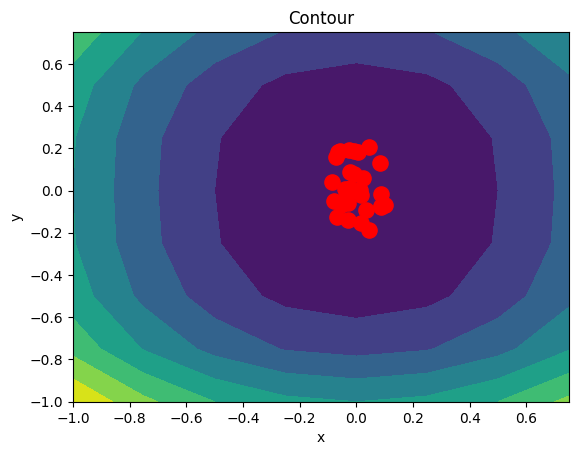

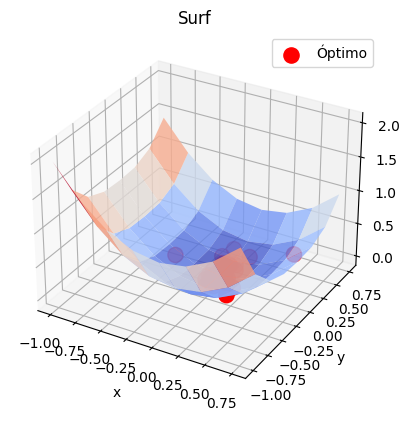

Mínimo en x= 0.013694536379721463  y= 0.0036367648794477583  f(x,y)= 0.00018758842672160974


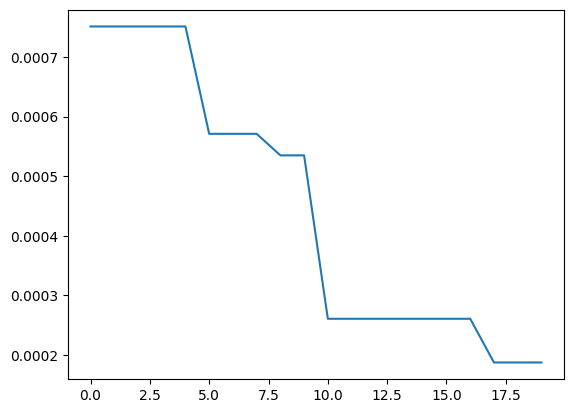

In [10]:
for i in range(mu):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    sigma[:, i] = 0.5 * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x[:, 0:mu], [0,0], xl, xu)

    for i in range(l):

        r1 = np.random.randint(mu)
        r2 = r1

        while r2 == r1:
            r2 = np.random.randint(mu)

        x[:, mu+i] = Recombination(x[:, r1], x[:, r2])
        sigma[:, mu+i] = Recombination(sigma[:, r1], sigma[:, r2])

        r = np.random.normal(0, sigma[:, mu+i], D)
        x[:, mu+i] = x[:, mu+i] + r
        fitness[mu+i] = f(x[0, mu+i], x[1, mu+i])

    Idx = np.argsort(fitness)
    x = x[:, Idx]
    sigma = sigma[:, Idx]
    fitness = fitness[Idx]

    p_plot[g] = np.min(fitness)

Idx_b = np.argmin(fitness)
plot_surf(f, x, xl, xu)
plt.plot(range(G), p_plot)
print("Mínimo en x=", x[0, Idx_b], " y=", x[1, Idx_b], " f(x,y)=", f(x[0, Idx_b], x[1, Idx_b]))
